# Final Excercise

In this notebook, you will find the last exercise of the lecture:
You are handed an initial dataset with several features and a univariate target. Next, you have to decide how to proceed. Since you do not have enough data to yet construct a classifier/predictor of any sensible evaluation metrics, the first task is, therefore, to acquire more data. For this purpose you can obtain batches of data according to your own design of experiments, so you will need to decide which experiments you consider necessary to perform. 

You will have four opportunities to acquire more data. Each time you have to decide which experiments to run and send those to Franz Götz-Hahn as a CSV file. The deadlines are 16.06.2023, 23.06.2023, 30.06.2023, and 07.07.2023 and 12:00 (noon). The format in all cases is a table with one row for each choosable feature, and the column entries corresponding to the desired values. Each individual sample will take approximately 30min, so pick a reasonable amount of experiments. For example, you will get the result for 100 experiments roughly 50 hours after the respective deadline. Should the experiment not be conductible, you will get a ``None`` as a result, e.g., if a feature value is out of range.

Once you have your data, you should compare the performance of different classifiers in predicting the targets. The classifiers to compare are [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). You should utilize all the different parts of the E2ML lecture that you considern appropriate. This could include Data Preprocessing, Design of Experiments for the batches, deciding on Performance Measures, Statistical Significance Testing of a hypothesis, Design of Experiments for Hyperparameter Optimization.

Should you wish to present the results from this excercise in the oral examination, you need to hand in your entire package until 14.07.2023-23:59 as a GitHub Repository. Send the link to the (public) repository to Franz Götz-Hahn via [E-Mail](mailto:franz.goetz-hahn@uni-kassel.de). Please use the README of the repository to describe the structure of the package, include any required packages in the setup.py, add the data in the data subfolder, save any results in the results subfolder, and include a _descriptive_ jupyter notebook in the notebooks subfolder.

Do note, that the point of this excercise is **not** to achieve the best performance of your models, but rather to document your process and give the motivation behind your chosen approaches, _even the ones that failed_.

In [459]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# from e2ml import utils

### **Mollusc Classification** <a class="anchor" id="heart"></a>

Your dataset describes some physical measurements of a specific type of molluscs. Your goal is to predict the `Stage of Life` of the mollusc. The data you can get looks as follows:


| Sex	|Length	|Width	|Height|	Weight	|Non_Shell Weight	|Intestine Weight	|Shell Weight	|Stage of Life |
| ---                           | ----   | ----    | ----    | ----   |----             |----    |---- | ---------- |
| {Male (M), Female (F), Indeterminate (I)} | float (inches)     | float (inches)     |  float (inches)     | float (gram)      | float (gram)              | float (gram)     |  float (gram)     | {Child, Adolescent (Adole), Adult}      |

The table headings are identical to the column names in the corresponding CSV-files. 

We can send out divers that look for molluscs that fit your needs, which will subsequently be analyzed in a laboratory. You can request molluscs with all features except the Stage of Life attribute, as it is the target. The first day of diving has already been completed. After 8 hours of diving, they brought up the following molluscs:

In [460]:
initial_molluscs_data = pd.read_csv("../data/initial_molluscs_data.csv")
initial_molluscs_data

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,F,0.450,0.345,0.120,0.4165,0.1655,0.0950,0.1350,Adult
1,F,0.475,0.380,0.145,0.5700,0.1670,0.1180,0.1870,Adole
2,M,0.610,0.485,0.170,1.0225,0.4190,0.2405,0.3600,Adult
3,I,0.430,0.340,0.105,0.4405,0.2385,0.0745,0.1075,Adole
4,M,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,Adult
5,M,0.600,0.475,0.175,1.3445,0.5490,0.2875,0.3600,Child
6,I,0.515,0.390,0.110,0.5310,0.2415,0.0980,0.1615,Adult
7,F,0.625,0.495,0.160,1.1115,0.4495,0.2825,0.3450,Child
8,F,0.650,0.520,0.195,1.6275,0.6890,0.3905,0.4320,Adult
9,F,0.620,0.480,0.165,1.0430,0.4835,0.2210,0.3100,Adult


In [461]:
# Quick helper functions for calculating datapoint count and data generation time


def calculate_datapoint_count(duration_days=0, duration_hours=0):
    return (duration_days * 24 + duration_hours) * 2


def calculate_datageneration_time(datapoint_count):
    return datapoint_count / 2 / 24

### Initial data analysis:

Due to time constraints first real analysis will bes possible after 6 days. Therefor data for 6 days will be requested.

In [462]:
# Create copy of initial data
molluscs_data = initial_molluscs_data.copy()

In [463]:
# Add numeric values for Sex and Stage of life
def sex_to_num(data):
    if type(data) == pd.Series:
        return sex_to_num(data["Sex"])
    if data == "M":
        return 1
    elif data == "F":
        return 2
    elif data == "I":
        return 0
    else:
        return -1


molluscs_data["Sex_Num"] = molluscs_data.apply(lambda row: sex_to_num(row), axis=1)


def stage_to_num(data):
    if type(data) == pd.Series:
        return stage_to_num(data["Stage of Life"])
    if data == "Child":
        return 0
    elif data == "Adole":
        return 1
    elif data == "Adult":
        return 2
    else:
        return -1


molluscs_data["Stage_Num"] = molluscs_data.apply(lambda row: stage_to_num(row), axis=1)

molluscs_data

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life,Sex_Num,Stage_Num
0,F,0.450,0.345,0.120,0.4165,0.1655,0.0950,0.1350,Adult,2,2
1,F,0.475,0.380,0.145,0.5700,0.1670,0.1180,0.1870,Adole,2,1
2,M,0.610,0.485,0.170,1.0225,0.4190,0.2405,0.3600,Adult,1,2
3,I,0.430,0.340,0.105,0.4405,0.2385,0.0745,0.1075,Adole,0,1
4,M,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,Adult,1,2
5,M,0.600,0.475,0.175,1.3445,0.5490,0.2875,0.3600,Child,1,0
6,I,0.515,0.390,0.110,0.5310,0.2415,0.0980,0.1615,Adult,0,2
7,F,0.625,0.495,0.160,1.1115,0.4495,0.2825,0.3450,Child,2,0
8,F,0.650,0.520,0.195,1.6275,0.6890,0.3905,0.4320,Adult,2,2
9,F,0.620,0.480,0.165,1.0430,0.4835,0.2210,0.3100,Adult,2,2


In [464]:
# Analyze the data
molluscs_data.describe()

,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Sex_Num,Stage_Num
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.0000
mean,0.534375,0.421875,0.144062,0.877875,0.376344,0.187531,0.254938,1.3125,1.3125
std,0.124176,0.105560,0.041240,0.496578,0.224390,0.109644,0.135996,0.7932,0.7932
min,0.205000,0.155000,0.045000,0.042500,0.017000,0.005500,0.015500,0.0000,0.0000
25%,0.468750,0.371250,0.117500,0.508375,0.220625,0.097250,0.154875,1.0000,1.0000
50%,0.560000,0.442500,0.155000,0.915000,0.370500,0.201000,0.267500,1.5000,1.5000
75%,0.621250,0.487500,0.171250,1.163625,0.497125,0.268250,0.360000,2.0000,2.0000
max,0.680000,0.560000,0.195000,1.777500,0.861000,0.390500,0.455000,2.0000,2.0000


In [465]:
# Split dataset based on Sex
molluscs_data_female = molluscs_data[molluscs_data["Sex"] == "F"]
molluscs_data_male = molluscs_data[molluscs_data["Sex"] == "M"]
molluscs_data_indeterminate = molluscs_data[molluscs_data["Sex"] == "I"]
molluscs_data_dict = {
    "F": molluscs_data_female,
    "M": molluscs_data_male,
    "I": molluscs_data_indeterminate,
}

print(
    "Female:\n",
    molluscs_data_female.describe(),
    "\n\n\n\n------\nMale:\n",
    molluscs_data_male.describe(),
    "\n\n\n\n------\nIndeterminate:\n",
    molluscs_data_indeterminate.describe(),
)

Female:
          Length     Width    Height    Weight  Non_Shell Weight  \
count  8.000000  8.000000  8.000000  8.000000          8.000000   
mean   0.577500  0.455625  0.158750  1.006500          0.429688   
std    0.083195  0.072528  0.026559  0.487785          0.246048   
min    0.450000  0.345000  0.120000  0.416500          0.165500   
25%    0.520000  0.406250  0.142500  0.666375          0.266750   
50%    0.602500  0.465000  0.157500  0.925250          0.385750   
75%    0.631250  0.501250  0.172500  1.240500          0.534875   
max    0.680000  0.560000  0.195000  1.777500          0.861000   

       Intestine Weight  Shell Weight  Sex_Num  Stage_Num  
count          8.000000      8.000000      8.0   8.000000  
mean           0.219500      0.283625      2.0   1.250000  
std            0.104475      0.109641      0.0   0.707107  
min            0.095000      0.135000      2.0   0.000000  
25%            0.139000      0.193000      2.0   1.000000  
50%            0.201000    

In [466]:
# Calculate the mean and standard deviation for each feature for each Sex in the dataset
female_means = dict()
male_means = dict()
indeterminate_means = dict()
female_stds = dict()
male_stds = dict()
indeterminate_stds = dict()

for feature in initial_molluscs_data.columns:
    if feature == "Sex" or feature == "Stage of Life":
        continue
    female_means[feature] = molluscs_data_female[feature].mean()
    male_means[feature] = molluscs_data_male[feature].mean()
    indeterminate_means[feature] = molluscs_data_indeterminate[feature].mean()
    female_stds[feature] = molluscs_data_female[feature].std()
    male_stds[feature] = molluscs_data_male[feature].std()
    indeterminate_stds[feature] = molluscs_data_indeterminate[feature].std()

means_dict = {
    "F": female_means,
    "M": male_means,
    "I": indeterminate_means,
}

stds_dict = {
    "F": female_stds,
    "M": male_stds,
    "I": indeterminate_stds,
}

print(
    "Female:\n",
    female_means,
    female_stds,
    "\n------\nMale:\n",
    male_means,
    male_stds,
    "\n------\nIndeterminate:\n",
    indeterminate_means,
    indeterminate_stds,
    sep="\n",
)

Female:

{'Length': 0.5775, 'Width': 0.45562500000000006, 'Height': 0.15875, 'Weight': 1.0065, 'Non_Shell Weight': 0.4296875, 'Intestine Weight': 0.2195, 'Shell Weight': 0.283625}
{'Length': 0.08319512348346249, 'Width': 0.072527704066397, 'Height': 0.026558560632254584, 'Weight': 0.48778456895876254, 'Non_Shell Weight': 0.2460478956713219, 'Intestine Weight': 0.10447521920805636, 'Shell Weight': 0.10964089109451819}

------
Male:

{'Length': 0.52, 'Width': 0.41900000000000004, 'Height': 0.146, 'Weight': 0.9589000000000001, 'Non_Shell Weight': 0.4003, 'Intestine Weight': 0.20600000000000002, 'Shell Weight': 0.29510000000000003}
{'Length': 0.18258559636510216, 'Width': 0.15274161188098023, 'Height': 0.05748912940721924, 'Weight': 0.5324874881159181, 'Non_Shell Weight': 0.22004363203692126, 'Intestine Weight': 0.11409206808538444, 'Shell Weight': 0.16753372794753896}

------
Indeterminate:

{'Length': 0.44333333333333336, 'Width': 0.33666666666666667, 'Height': 0.10166666666666667, 'Weig

In [467]:
# Calculate datapoint count for 6 days
datapoint_count_period_1 = calculate_datapoint_count(duration_days=6)
datapoint_count_period_1

288

##### Helper functions for generating data using latin hypercubes based on the initial data

In [468]:
from e2ml.experimentation import lat_hyp_cube

# Generate 288 new rows of data using Latin hypercube sampling


def generate_lat_hyp_cube_datareq(datapoint_count=288, random_state=42):
    """
    Generates new data request using Latin hypercube sampling
    The data request is generated using the initial data as a reference
    It contains the same features as the initial data, except for the "Stage of Life" feature

    Parameters
    ----------
    datapoint_count : int
        Number of datapoints to generate
    random_state : int
        Random state to use for the generation

    Returns
    -------
    new_data : pandas.DataFrame
        New data request generated using Latin hypercube sampling
    """
    new_data = pd.DataFrame(columns=initial_molluscs_data.columns).drop(
        columns=["Stage of Life"]
    )

    if datapoint_count == 0:
        return new_data

    random_state = np.random.RandomState(random_state)

    new_data = pd.DataFrame(
        lat_hyp_cube(datapoint_count, len(initial_molluscs_data.columns) - 2),
        columns=initial_molluscs_data.columns.drop(["Stage of Life", "Sex"]),
    )

    # Assign a sex to each row of data make sure that data is balanced
    new_data["Sex"] = np.append(
        np.repeat(["F", "M", "I"], datapoint_count // 3),
        np.random.choice(["F", "M", "I"], datapoint_count % 3),
    )

    row_num = {
        "F": -1,
        "M": -1,
        "I": -1
    }

    for idx, row in new_data.iterrows():
        sex = str(row["Sex"])
        for feature in initial_molluscs_data.columns.drop(["Stage of Life", "Sex"]):
            row_num[sex] += 1
            if row_num[sex] == 0:
                new_data.at[idx, feature] = molluscs_data_dict[sex][feature].min() - stds_dict[sex][feature]
                continue
            if row_num[sex] == 1:
                new_data.at[idx, feature] = molluscs_data_dict[sex][feature].max() + stds_dict[sex][feature]
                continue
            dist = np.random.normal(means_dict[sex][feature], 2 * stds_dict[sex][feature], size=datapoint_count * 2)
            min_val = min(dist[dist > 0])
            max_val = max(dist)
            #min_val = max(means_dict[sex][feature] - 2 * stds_dict[sex][feature], molluscs_data_dict[sex][feature].min())
            #max_val = means_dict[sex][feature] + 2 * stds_dict[sex][feature]
            # new_data.at[idx, feature] = new_data.at[idx, feature] * (molluscs_data_dict[sex][feature].max() - molluscs_data_dict[sex][feature].min()) + molluscs_data_dict[sex][feature].min()
            #new_val = 0
            #while new_val <= 0:
            #    new_val = np.random.normal(
            #        means_dict[sex][feature], stds_dict[sex][feature]
            #    )
            #new_data.at[idx, feature] = new_val
            new_data.at[idx, feature] = new_data.at[idx, feature] * (max_val - min_val) + min_val

    return new_data

#### Generate 288 datarequests

In [469]:
data_req_period_1 = generate_lat_hyp_cube_datareq(datapoint_count_period_1)
data_req_period_1.to_csv("../results/data_requests/data_req_period_1.csv", index=False)
data_req_period_1.describe()

,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.593472,0.513803,0.179050,1.559734,0.699579,0.331637,0.449973
std,0.389111,0.334828,0.114021,1.207513,0.535623,0.264146,0.356526
min,0.022414,0.013996,0.001931,0.013033,0.014502,0.001622,0.002354
25%,0.312561,0.240350,0.097041,0.544406,0.264325,0.112842,0.166711
50%,0.520480,0.467568,0.149038,1.223465,0.538021,0.234111,0.341285
75%,0.800766,0.698437,0.239961,2.317889,1.074062,0.544953,0.678523
max,1.728582,1.401717,0.584066,5.121483,2.045551,1.006709,1.459112


In [470]:
# Split data request by sex
data_req_period_1_female = data_req_period_1[data_req_period_1["Sex"] == "F"]
data_req_period_1_male = data_req_period_1[data_req_period_1["Sex"] == "M"]
data_req_period_1_indeterminate = data_req_period_1[data_req_period_1["Sex"] == "I"]
data_req_period_1_dict = {
    "F": data_req_period_1_female,
    "M": data_req_period_1_male,
    "I": data_req_period_1_indeterminate,
}

print(
    "Female:\n",
    data_req_period_1_female.describe(),
    "\n\n\n\n------\nMale:\n",
    data_req_period_1_male.describe(),
    "\n\n\n\n------\nIndeterminate:\n",
    data_req_period_1_indeterminate.describe(),
)

Female:
           Length      Width     Height     Weight  Non_Shell Weight  \
count  96.000000  96.000000  96.000000  96.000000         96.000000   
mean    0.556342   0.475940   0.178720   1.991568          0.906405   
std     0.275023   0.244215   0.081937   1.183306          0.578923   
min     0.049471   0.045110   0.003124   0.013033          0.037337   
25%     0.351717   0.256308   0.123585   1.124631          0.348866   
50%     0.524714   0.503305   0.177071   1.810089          0.900337   
75%     0.728451   0.667564   0.237387   3.185458          1.362909   
max     1.185914   0.901626   0.342456   4.516076          2.045551   

       Intestine Weight  Shell Weight  
count         96.000000     96.000000  
mean           0.415574      0.480369  
std            0.256401      0.292068  
min            0.005076      0.006430  
25%            0.202216      0.218852  
50%            0.396384      0.500956  
75%            0.644447      0.749831  
max            0.927513      1.

C:\Users\lordp\AppData\Local\Temp\ipykernel_12496\3441686201.py:36: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")


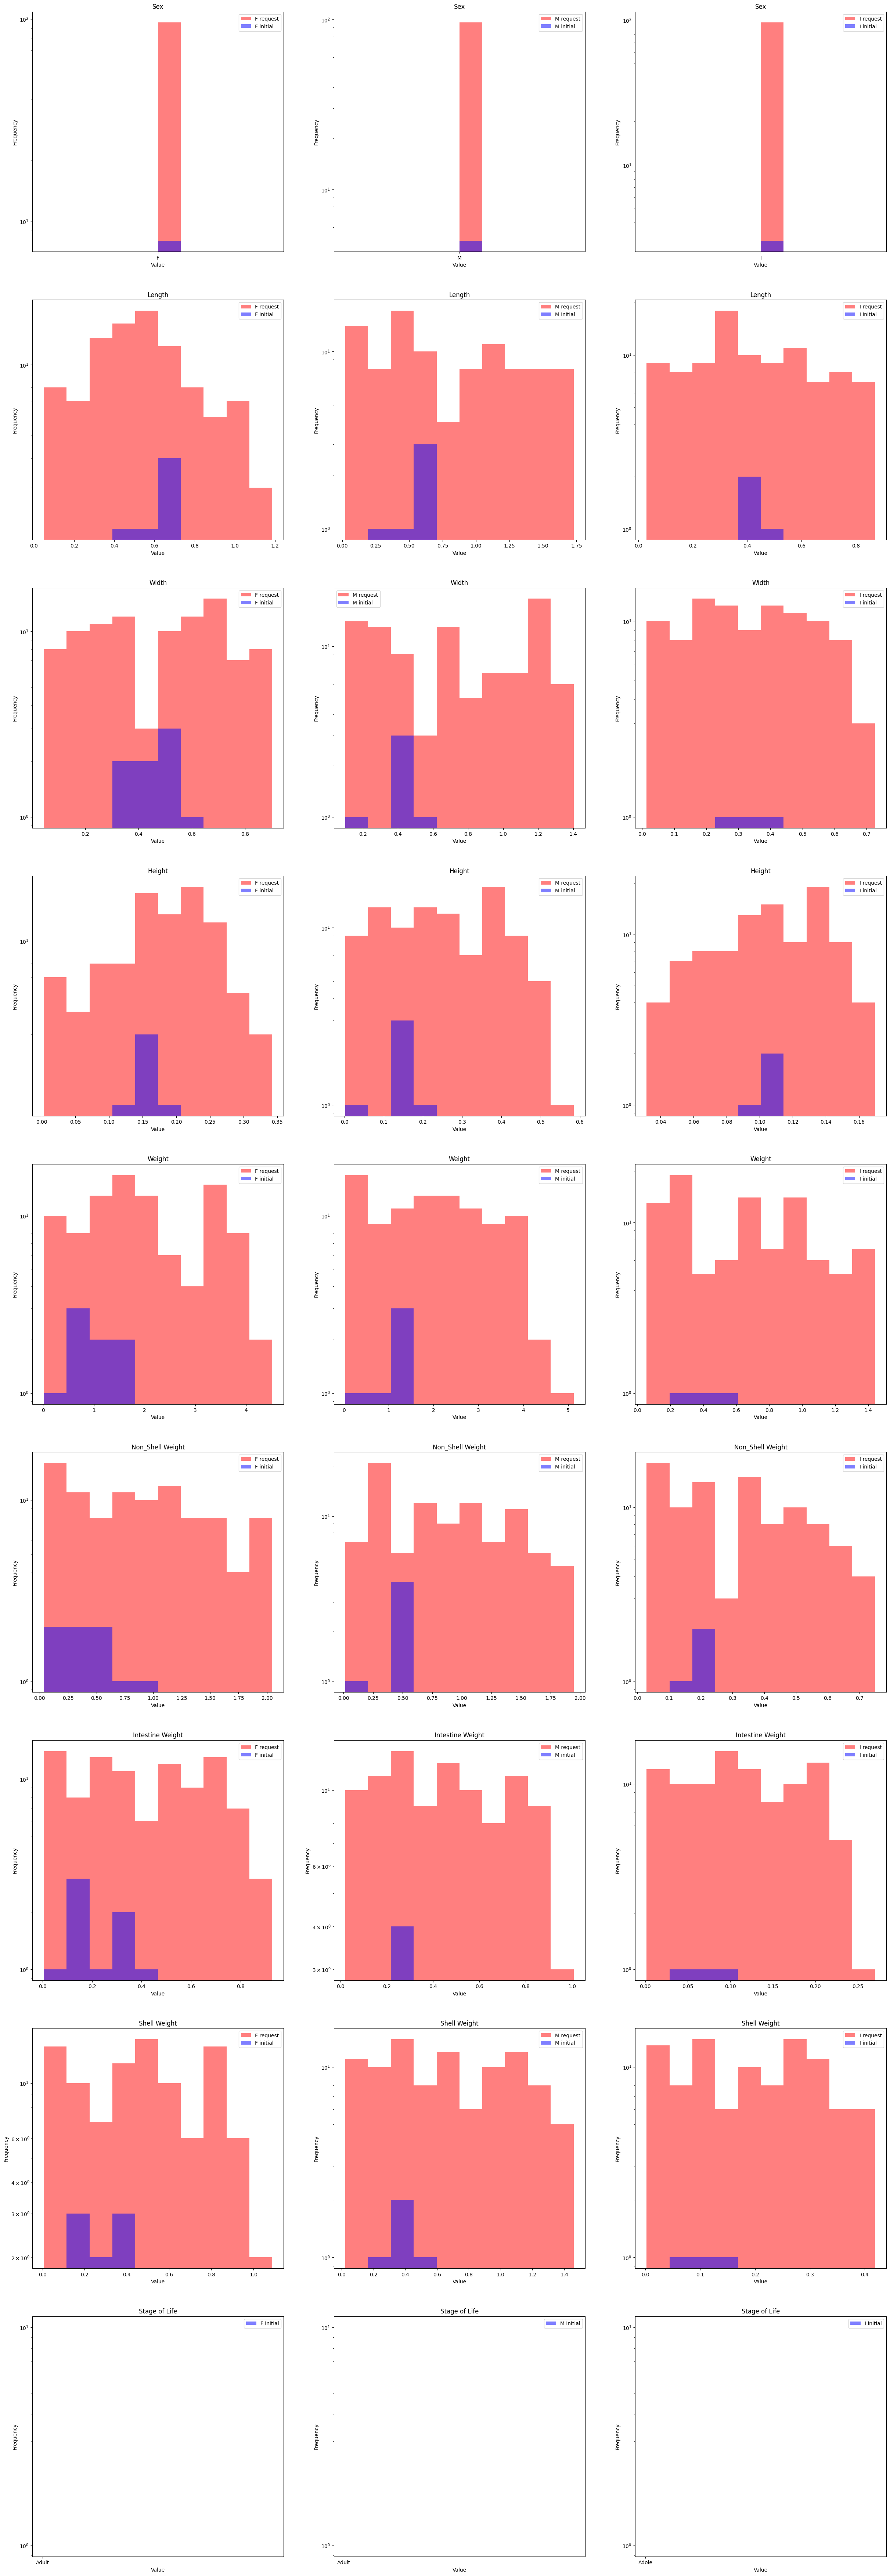

In [471]:
feature_count = len(initial_molluscs_data.columns)
fig, axs = plt.subplots(feature_count, 3, figsize=(30, 90))

for idx, feature in enumerate(initial_molluscs_data.columns):
    label = ["Female", "Male", "Indeterminate"]
    for i_idx, sex in enumerate(["F", "M", "I"]):
        ax = axs[idx, i_idx]
        if feature != "Stage of Life":
            (n, bins, patches) = ax.hist(
                data_req_period_1_dict[sex][feature],
                alpha=0.5,
                stacked=True,
                color=["red"],
                label=(sex + " request"),
            )

        ax.hist(
            molluscs_data_dict[sex][feature],
            alpha=0.5,
            stacked=True,
            color=["blue"],
            label=(sex + " initial"),
            bins=bins,
        ) if bins is not None else ax.hist(
            molluscs_data_dict[sex][feature],
            alpha=0.5,
            stacked=True,
            color=["blue"],
            label=(sex + " initial"),
        )

        ax.set_title(feature)
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
        ax.legend()
        ax.set_yscale("log")
plt.show()